# Tutorial

Import ProjectPy and scanpy

In [15]:
! pip install -i https://test.pypi.org/simple/ ProjectPy==0.1.5
! pip install scanpy
import scanpy as sc
import ProjectPy

Looking in indexes: https://test.pypi.org/simple/


Reading in the datasets with scanpy.

In [16]:
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('test_target.h5ad')

In this case, the patterns and dataset do not have the same genes, so we take the set intersection of their genes.

In [17]:
dataset_filtered, patterns_filtered = ProjectPy.projection_object.filterAnnDatas(dataset, patterns, 'gene_id')

(55371, 428) dataset filter shape
(80, 428) patterns filter shape


Now that the datasets have the same genes, we can now run a regression to find the use of the patterns in the dataset. In our case, the "discovered" matrix can be found in dataset_filtered.obsm['retinaProject']

In [18]:
ProjectPy.projection_object.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'retinaProject', alpha=.01, L1=.01)

(55371, 80)


Now that we have our pattern matrix as described in Enter the Matrix: Factorization Uncovers Knowledge of Omics. To see if certain features correlate with a cell type we create a pearson matrix and plot.

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


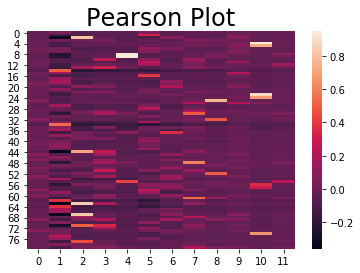

In [19]:
ProjectPy.projection_object.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'retinaProject', 'PearsonRetina', True)

Now we are going to project the pattern matrix down into 2-dimension and then plot it colored by cell type.

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


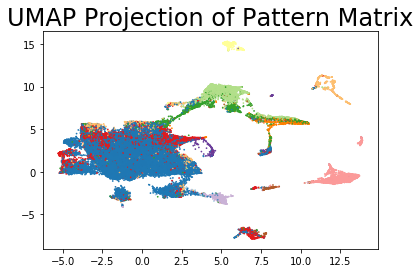

In [20]:
ProjectPy.projection_object.UMAP_Projection(dataset_filtered, 'CellType', 'retinaProject', 'retinaUMAP', 12, plot=True)

Now we are going to make plots that show the usage of each feature in each sample. Each point's/cell's color is based on the coefficient of the feature. Also, above each plot a few metrics are displayed to better understand the usage of that feature in the dataset.

Number of nonzero cells 3922
Percentage of nonzero cells 7.083130158386158
Max coefficient 0.1734013
Average coefficient 0.002191317


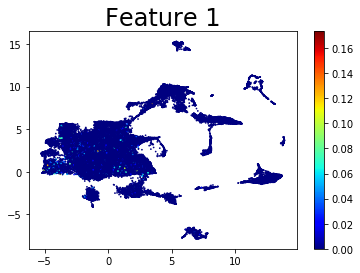

Number of nonzero cells 7290
Percentage of nonzero cells 13.16573657690849
Max coefficient 0.29678908
Average coefficient 0.00716726


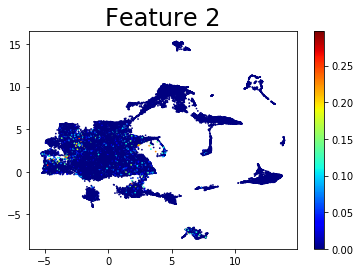

Number of nonzero cells 14969
Percentage of nonzero cells 27.034006971158185
Max coefficient 0.5433935
Average coefficient 0.028382646


In [ ]:
ProjectPy.projection_object.featurePlots(dataset_filtered, 80, 'retinaProject', 'retinaUMAP')